In [1]:
import numpy as np
import matplotlib.pyplot as plt

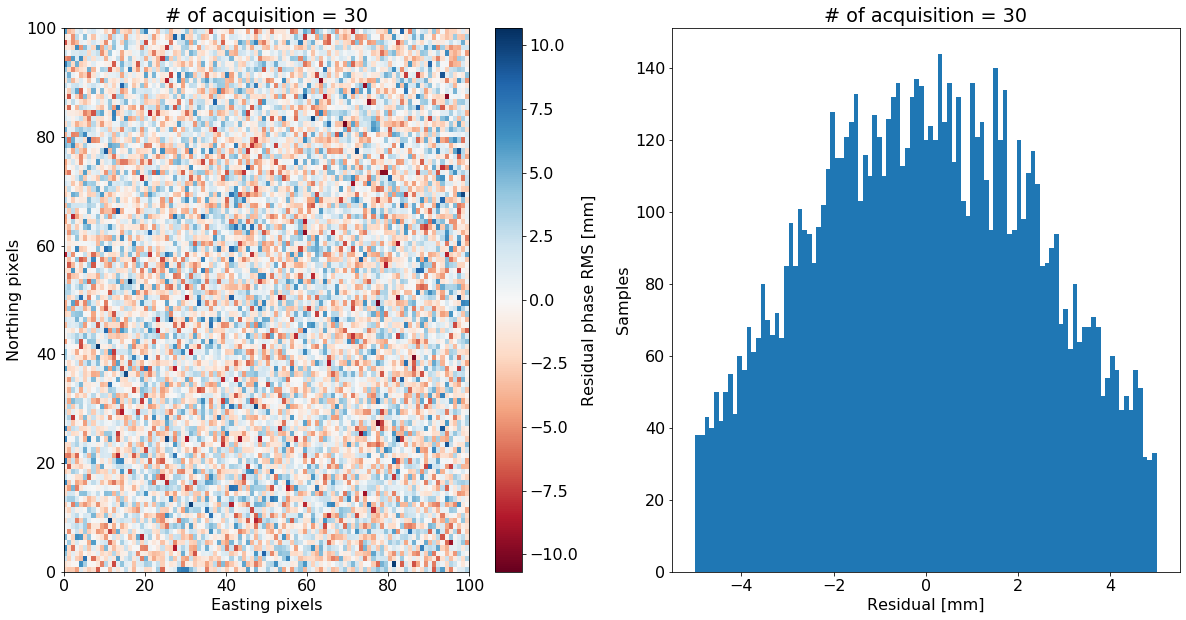

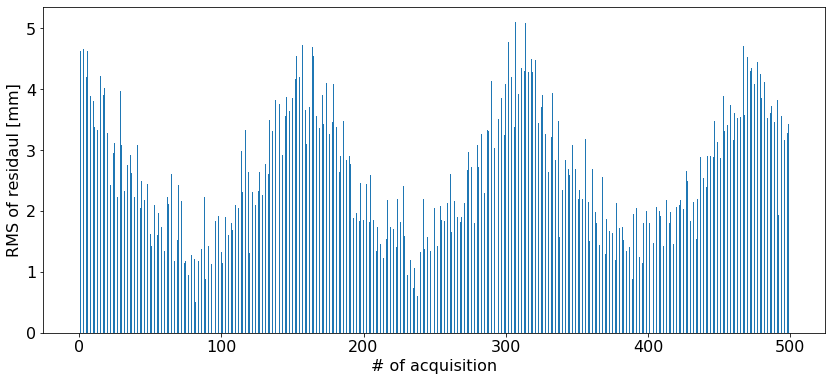

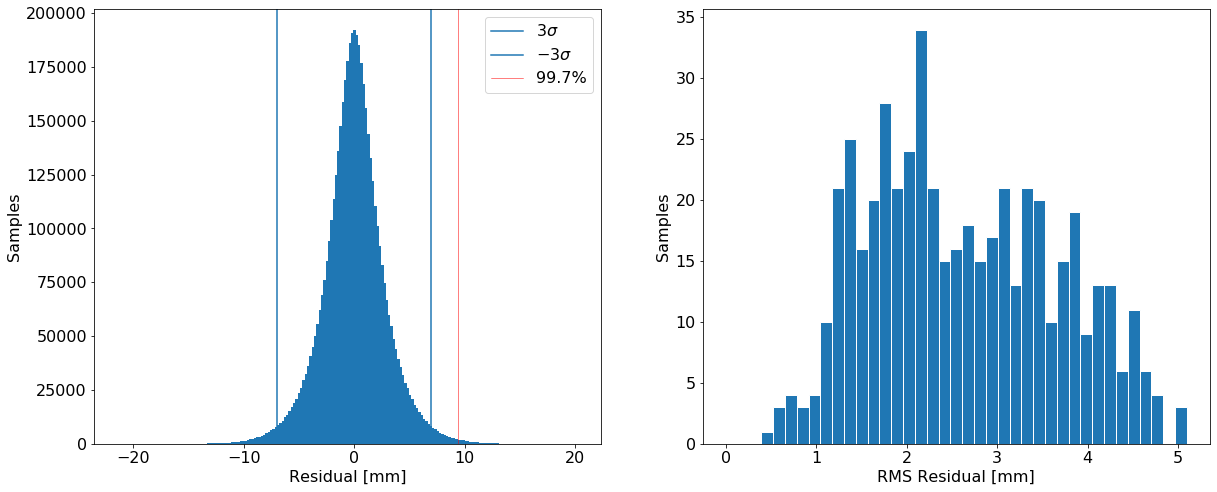

Median of residual 			=  0.0025913298274198443
Median of RMS 				=  2.4840119039794244
MAD of residual 			=  1.563573455113143
MAD of RMS (centered at 0) 		=  2.4840119039794244
MAD of RMS (centered at median of RMS) 	=  0.8238538258459127


In [362]:
# Assume residuals of time series is a zero-mean Gaussian distribution

# Num of acquisitions and size of the ifgram
N = 500
M = 100*100

# mean and standard deviation of Gaussian
mu    = 0    # zero mean
k     = 3
noise = np.random.normal(0,0.15,N)
sigma = k * (-np.abs(np.sin(x/50)) + 1.5 + noise)  # season-dependent standard deviation


# Generate some random residual matrix, shape: (N_pixels, N_acquisitions)
r = np.zeros([M,N])
for i in range(N):
    r[:,i] = np.random.normal(mu, sigma[i], M)   

    
# Show residual matrix for one aquisition
figsize = [20,10]
fontsize = 16
acq = 30

fig, ax = plt.subplots(ncols=2, figsize=figsize)
im = ax[0].pcolormesh(r[:,acq].reshape([100,100]), cmap='RdBu')
fig.colorbar(im, ax=ax[0], cmap='RdBu', label='Residual phase RMS [mm]')            

ax[0].set_xlabel('Easting pixels')
ax[0].set_ylabel('Northing pixels')
ax[0].set_title(f'# of acquisition = {acq}')

bins = np.linspace(-5,5,100)
ax[1].hist(r[:,acq].flatten(), bins)
ax[1].set_xlabel('Residual [mm]')
ax[1].set_ylabel('Samples')
ax[1].set_title(f'# of acquisition = {acq}')
plt.show()


# Calculate the Root-Mean-Square of the residual for each acquisition
rms = np.zeros(r.shape[1])
for i in range(r.shape[1]):
    rms[i] = (np.sum(r[:,i]**2)/r.shape[0])**0.5

plt.figure(figsize=[14,6])
plt.bar(np.arange(0,len(rms)),rms, width=0.4)
plt.xlabel('# of acquisition')
plt.ylabel('RMS of residaul [mm]')
plt.show()


# Calculate the MAD
MAD = 1.4826 * np.median(np.abs(r-np.median(r)))
threshold = 3*MAD + np.median(r)


# Plot all residuals
fig, ax = plt.subplots(ncols=2, figsize=[20,8])
bins = np.linspace(np.min(r),np.max(r),200)
ax[0].hist(r.flatten(), bins)
ax[0].axvline(x= threshold, label='$3\sigma$')
ax[0].axvline(x=-threshold, label='$-3\sigma$')
ax[0].axvline(x=np.percentile(r,99.7), color='r', lw=0.5, label='99.7%')
ax[0].set_xlabel('Residual [mm]')
ax[0].set_ylabel('Samples')
ax[0].legend()

# Plot all RMS 
bins = np.linspace(0,np.max(rms),40)
ax[1].hist(rms, bins, edgecolor='white')
ax[1].set_xlabel('RMS Residual [mm]')
ax[1].set_ylabel('Samples')
plt.show()


# ======================= Statistics ==============================
med_r    = np.median(r)                      # median of all residuals
med_rms  = np.median(rms)                    # median of all RMS residual

# Calculate the MAD (Median Absolute Deviation) in different ways
MAD_r    = np.median(np.abs(r   - med_r))    # MAD of the residual
MAD_rms0 = np.median(np.abs(rms - mu))       # MAD of RMS with respect to zero mean of the residual
MAD_rms1 = np.median(np.abs(rms - med_rms))  # MAD of RMS with respect to median of the RMS


print('Median of residual \t\t\t= ', med_r)
print('Median of RMS \t\t\t\t= ', med_rms)

print('MAD of residual \t\t\t= ', MAD_r)
print('MAD of RMS (centered at 0) \t\t= ', MAD_rms0)
print('MAD of RMS (centered at median of RMS) \t= ', MAD_rms1)


In [314]:
rms.size

500

# Gaussian Tests

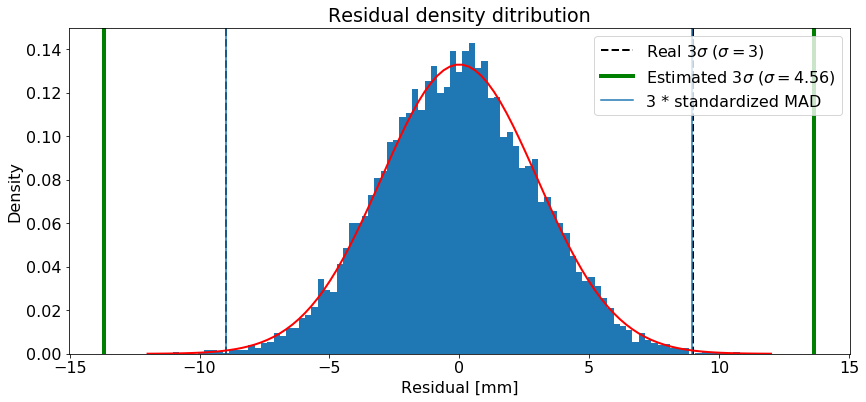

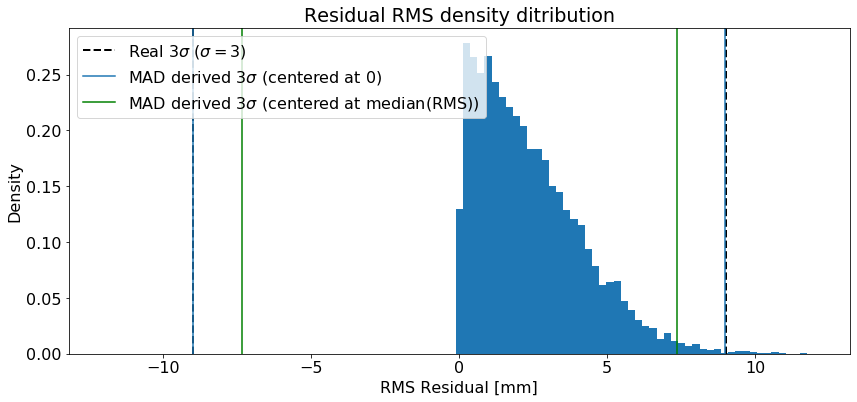

In [382]:
import scipy.stats as st

N = 10000
mu    = 0
sigma = 3
data  = np.random.normal(mu, sigma, N)
data[-3:] = 200

# Estimated the sigma
sigma_e = np.std(data)


# Calculate the MAD
MAD  = np.median(np.abs(data-np.median(data)))
MADn = 1.4826 * MAD
threshold = 3*MADn + np.median(data)

# Plot all residuals
ns = 1
pp = 100 * st.norm.cdf(ns)

fig, ax = plt.subplots(figsize=[14,6])
bins = np.linspace(mu-4*sigma,mu+4*sigma,100)

count, bins, ignored = ax.hist(data, bins, density=True)
ax.axvline(x= 3*sigma, color='k', linestyle='--', lw=2, label='Real $3\sigma$ ($\sigma=${})'.format(sigma))
ax.axvline(x= -3*sigma, color='k', linestyle='--', lw=2)
ax.axvline(x= 3*sigma_e, color='g', lw=4, label='Estimated $3\sigma$ ($\sigma=${:.2f})'.format(sigma_e))
ax.axvline(x=-3*sigma_e, color='g', lw=4)
ax.axvline(x=  threshold, label='3 * standardized MAD')
ax.axvline(x= -threshold)

#ax.axvline(x= np.percentile(data, pp), color='k', lw=2, label='{}$\sigma$, {:.2f}% interval'.format(ns, pp-(100-pp)))
#ax.axvline(x= np.percentile(data, 100-pp), color='k', lw=2)
#ax.axvline(x=  MAD, color='b', lw=2, label='MAD, {:.2f}% interval'.format(50))
#ax.axvline(x= -MAD, color='b', lw=2)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
ax.set_xlabel('Residual [mm]')
ax.set_ylabel('Density')
ax.legend()
plt.title('Residual density ditribution')
plt.show()



# =================== Calculate the RMS =================

rms = np.sqrt(data**2)

# Calculate the MAD
MAD       = np.median(np.abs(rms-0))
MADn      = 1.4826 * MAD
threshold = 3*MADn + 0

MAD0       = np.median(np.abs(rms-np.median(rms)))
MAD0n      = 1.4826 * MAD0
threshold0 = 3*MAD0n + np.median(rms)

fig, ax = plt.subplots(figsize=[14,6])
bins = np.linspace(mu-4*sigma,mu+4*sigma,100)
count, bins, ignored = ax.hist(rms, bins, density=True)
ax.axvline(x= 3*sigma, color='k', linestyle='--', lw=2, label='Real $3\sigma$ ($\sigma=${})'.format(sigma))
ax.axvline(x= -3*sigma, color='k', linestyle='--', lw=2)

ax.axvline(x=  threshold, label='MAD derived $3\sigma$ (centered at 0)')
ax.axvline(x= -threshold)

ax.axvline(x=  threshold0, color='g', label='MAD derived $3\sigma$ (centered at median(RMS))')
ax.axvline(x= -threshold0, color='g')

#ax.axvline(x= np.percentile(rms, pp), color='r', lw=0.5, label='{}$\sigma$, {:.2f}-th'.format(ns, pp-(100-pp)))
#ax.axvline(x= np.percentile(rms, 100-pp), color='r', lw=0.5, label='-{}$\sigma$, {:.2f}-th'.format(ns, pp-(100-pp)))
ax.set_xlabel('RMS Residual [mm]')
ax.set_ylabel('Density')
ax.legend()
plt.title('Residual RMS density ditribution')
plt.show()


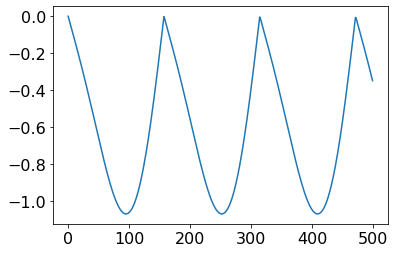

In [350]:
x=np.arange(0,500)
y=-np.abs(np.sin(x/50))+0.2*np.sin(x/25)
plt.figure()
plt.plot(x,y)
plt.show()

In [363]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [ ]:
def plot_velocitymap(data, pts, model='linear', fig_dpi=300, vmin=-2, vmax=2, stdmax=0.4, ampmax=2.4, plot_seasonalAmp=False, gv=False):
    velo_file = f'velocity_{model}_2/{data}.h5'
    fname = f'{data}_{pts}_{model}_2'
    
    # model (default: plot the linear model results)
    if model=='linear':
        print('Linear fitting')
    elif model=='periodic':
        print('Linear + periodic fitting')
    else:
        print('Erorr: wrong model input')        
    
    v     = readfile.read(velo_file, datasetName='velocity')[0]*100
    meta  = readfile.read(velo_file, datasetName='velocity')[1]
    v_std = readfile.read(velo_file, datasetName='velocityStd')[0]*100
    if plot_seasonalAmp == True:
        try:
            s_amp = readfile.read(velo_file, datasetName='seasonalAmp')[0]*100
        except:
            print('Error: no seasonal amplitude data found!!')

    # read lat/lon info
    try:
        length    = int(meta['LENGTH'])
        width     = int(meta['WIDTH'])
        x_min     = float(meta['X_FIRST'])
        x_step    = float(meta['X_STEP'])
        y_min     = float(meta['Y_FIRST'])
        y_step    = float(meta['Y_STEP'])
        lats      = np.arange(y_min,length*y_step+y_min, y_step)    
        lons      = np.arange(x_min, width*x_step+x_min, x_step)
        ref_lat   = float(meta['REF_LAT'])
        ref_lon   = float(meta['REF_LON'])
    except:
        pass
    
    # read mask and mask the dataset
    mask_file = 'maskTempCoh.h5'   # 'waterMask.h5' or 'maskTempCoh.h5'
    mask_data = readfile.read(mask_file)[0]
    v[mask_data==0] = np.nan
    v_std[mask_data==0] = np.nan
    if plot_seasonalAmp == True:
        s_amp[mask_data==0] = np.nan

In [387]:
2*(100 * st.norm.cdf(3)-50)

99.73002039367398